# Welcome

Instructor: Tim Machado (tamachado@stanford.edu)

Workshop Assistants: Chris Roat (croat@stanford.edu), Zac Painter (zwp@stanford.edu)

Lesson based on content here: https://datacarpentry.org/image-processing/

Data to download: https://www.dropbox.com/s/1lll3wb9hg6x7wg/image-processing-data.zip?dl=0

Libraries you need installed:

``skimage
numpy
matplotlib``



In [ ]:
!pip install scikit-image
!pip install numpy
!pip instal matplotlib

### 1. Introduction
What sort of scientific questions can we answer with image processing / computer vision?
### 2. Image basics
How are images represented in digital format?
### 3. Image representation in skimage
How are digital images stored in Python with the skimage computer vision library?
### 4. Drawing and bitwise operations
How can we draw on skimage images and use bitwise operations and masks to select certain parts of an image?
### 5. Counting colonies
Putting the pieces together and writing a script to detect and count objects.

# 1. Introduction

### Morphometrics
Morphometrics involves counting the number of objects in an image, analyzing the size of the objects, or analyzing the shape of the objects. For example, we might be interested automatically counting the number of bacterial colonies growing in a Petri dish, as shown in this image:
<img src="img/00-colonies01.jpg" width=25% height=25%>

### Bacteria colony

We could use image processing to find the colonies, count them, and then highlight their locations on the original image, resulting in an image like this:
<img src="img/00-colony-mask.png" width=50% height=50%>

### Colorimetrics
Colorimetrics involves analyzing the color of objects in an image. For example, consider this video of a titrant being added to an analyte:

(link here: https://www.youtube.com/watch?v=NLSY5S8CABk&feature=youtu.be&t=554)
<img src="img/00-color-1.png" width=25% height=25%>
<img src="img/00-color-2.png" width=25% height=25%>

We could use image processing to look at the color of the solution, and determine when the titration is complete. This graph shows how the three component colors (red, green, and blue) of the solution change over time; the change in the solution’s color is obvious.

<img src="img/00-colorimetric.png" width=50% height=50%>

### **Question:** 
Why bother automating these tasks instead of doing them by hand?

# 2. Image Basics

### Pixels
<img src="img/01-original.jpg" width=75% height=75%>
<img src="img/01-enlarged.jpg" width=50% height=50%>

### Coordinate System

The coordinate system we usually see in mathematics has a horizontal x-axis and a vertical y-axis, like this:
<img src="img/01-cartesian.png" width=50% height=50%>

The modified coordinate system used for our images will have only positive coordinates, the origin will be in the upper left corner instead of the center, and y coordinate values will get larger as they go down instead of up, like this:
<img src="img/01-image-coordinates.png" width=50% height=50%>


### Color System

Digital images use some color model to create a broad range of colors from a small set of primary colors. Although there are several different color models that are used for images, the most commonly occurring one is the RGB (Red, Green, Blue) model.

The RGB model is an additive color model, which means that the primary colors are mixed together to form other colors. In the RGB model, the primary colors are red, green, and blue – thus the name of the model. Each primary color is often called a channel.

Any particular color in the RGB model can be expressed by a triplet of integers in [0, 255], representing the red, green, and blue channels, respectively. A larger number in a channel means that more of that primary color is present.

### What colors are these examples?
(255, 0, 0)  
(0, 255, 0)  
(0, 0, 255)  
(255, 255, 255)  
(0, 0, 0)  
(128, 128, 128)

### Useful example colors:
<img src="img/01-color-table.png" width=50% height=50%>

### Other color spaces exist

<img src="img/color-vals.png" width=50% height=50%>

<img src="img/components-hsv.png" width=50% height=50%>

See more: https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/


https://scikit-image.org/docs/dev/api/skimage.color.html

# 3. Image representation in skimage

<img src="img/02-chair-orig.jpg" width=50% height=50%>
<img src="img/02-chair-layers-rgb.png" width=50% height=50%>

In [2]:
import numpy as np

matrix = np.identity(100)
print(matrix)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [3]:
import matplotlib.pyplot as plt

plt.imshow(matrix)

In [4]:
import skimage.io

image = skimage.io.imread(fname='chair.jpg')

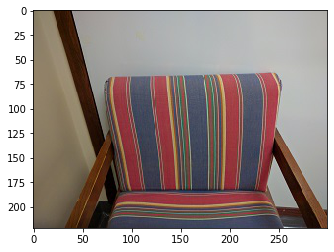

In [5]:
plt.imshow(image)

In [9]:
skimage.io.imsave(fname='chair2.tiff', arr=image)

In [10]:
import numpy as np

In [11]:
np.shape(image)

(222, 300, 3)

In [26]:
new_shape = ((image.shape[0] // 2), (image.shape[1] // 2), image.shape[2])
new_shape

(111, 150, 3)

In [20]:
np.array(image.shape, dtype='int') // 2

array([111, 150,   1])

In [21]:
import skimage.transform

In [27]:
small = skimage.transform.resize(image=image, output_shape=new_shape)

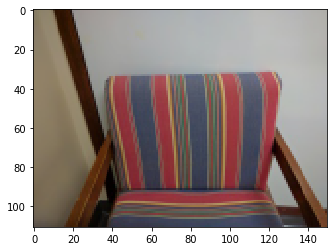

In [28]:
plt.imshow(small)

In [30]:
roots = skimage.io.imread('roots.jpg')

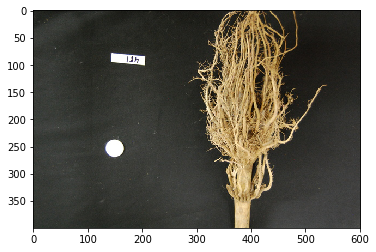

In [31]:
plt.imshow(roots)

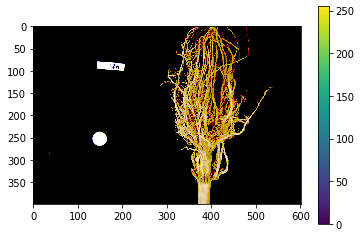

In [41]:
roots[roots < 128] = 0
plt.imshow(roots)
plt.colorbar()

In [34]:
roots = skimage.io.imread('roots.jpg')
np.shape(roots)

(400, 602, 3)

In [35]:
import skimage.color
gray_roots = skimage.color.rgb2gray(roots)

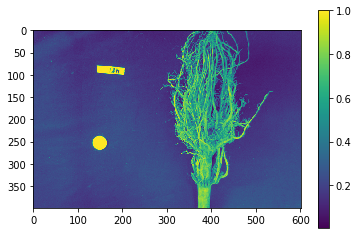

In [40]:
plt.imshow(gray_roots)
plt.colorbar()

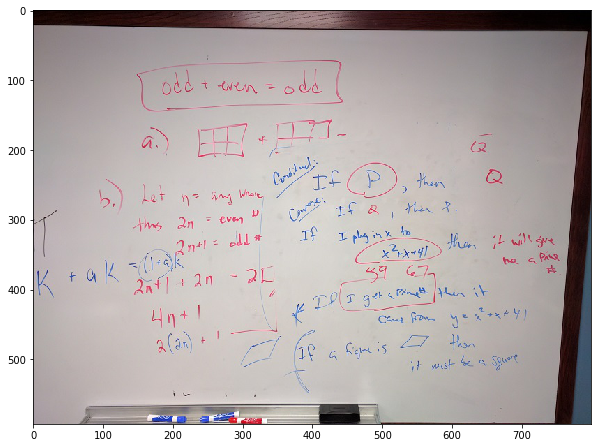

In [43]:
whiteboard = skimage.io.imread('white-board.jpg')
plt.figure(figsize=(10,10))
plt.imshow(whiteboard)

In [44]:
clip = whiteboard[60:151, 135:450, :]
clip.shape

(91, 315, 3)

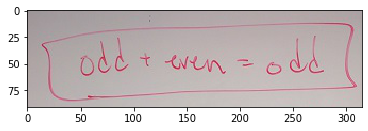

In [45]:
plt.imshow(clip)

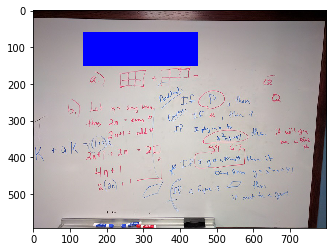

In [49]:
# replace area with chosen color
white_color = [0, 0, 255]
whiteboard[60:151, 135:450, :] = white_color

plt.imshow(whiteboard)

# 4. Drawing and bitwise operations

<img src="maize-roots.jpg" width=50% height=50%>

In [50]:
# maize-roots.jpg
import skimage
import matplotlib.pyplot as plt
import numpy as np

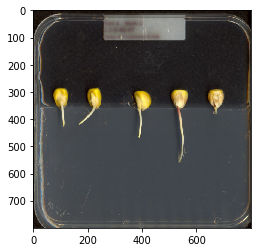

In [52]:
image = skimage.io.imread('maize-roots.jpg')
plt.imshow(image)

In [59]:
# create a basic mask
mask = np.ones(shape=image.shape[0:2], dtype='bool')
plt.imshow(mask)

In [73]:
from skimage.viewer import ImageViewer
viewer = ImageViewer(image)
viewer.show()

[]

In [67]:
rr, cc = skimage.draw.rectangle(start=(357, 44), end=(740, 720))
mask[rr, cc] = False

In [68]:
plt.imshow(mask)

In [70]:
image[mask] = 0

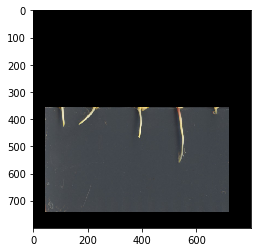

In [71]:
plt.imshow(image)

Write a Python program that reads in a well plate image to produce a mask that will mask out everything we are not interested in studying from the image. Input:
<img src="well-plate.jpg" width=25% height=25%>

Your program should produce output that looks like this:
<img src="img/03-wellplate-masked.jpg" width=25% height=25%>

You may have noticed that the centers of each well in the image are very regular. Assuming that the images are scanned in such a way that the wells are always in the same place, and that the image is perfectly oriented (i.e., it does not slant one way or another), we could produce our well plate mask without having to read in the coordinates of the centers of each well. Assume that the center of the upper left well in the image is at location x = 91 and y = 108, and that there are 70 pixels between each center in the x dimension and 72 pixels between each center in the y dimension. Each well still has a radius of 16 pixels. Write a Python program that produces the same output image as in the previous challenge, but without having to read in the centers.txt file. *Hint: use nested for loops.*



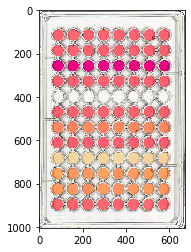

In [79]:
plt.imshow(skimage.io.imread('well-plate.jpg'))

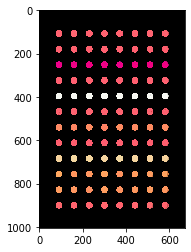

In [75]:
# well-plate.jpg
import numpy as np
import skimage
import matplotlib.pyplot as plt

image = skimage.io.imread('well-plate.jpg')

mask = np.ones(shape=image.shape[0:2], dtype='bool')

# position of top circle
x0 = 91
y0 = 108

# spaces between wells
deltaX = 70
deltaY = 72

x = x0
y = y0

colors = []
for row in range(12):
    x = x0
    for col in range(8):
        rr, cc = skimage.draw.circle(y, x, radius=16, shape=image.shape[0:2])
        mask[rr, cc] = False
        colors.append(np.mean(image[rr, cc]))
        x += deltaX
    y += deltaY

image[mask] = 0
plt.imshow(image)

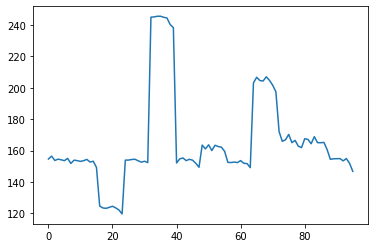

In [76]:
plt.plot(colors)

In [77]:
len(colors)

96

# 5. Counting colonies

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io

In [81]:
colonies = io.imread('colonies01.tif')

In [87]:
plt.imshow(colonies)
plt.colorbar()

In [89]:
gray = color.rgb2gray(colonies)
plt.imshow(gray, cmap='gray')
plt.colorbar()

In [90]:
from skimage import filters

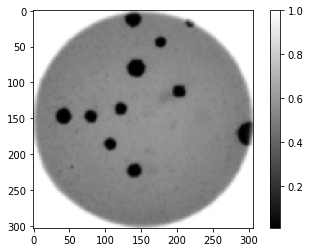

In [96]:
sigma = 1.5
filtered = filters.gaussian(gray, sigma)
plt.imshow(filtered, cmap='gray')
plt.colorbar()

Text(0.5, 0, 'normalized pixel intensity')

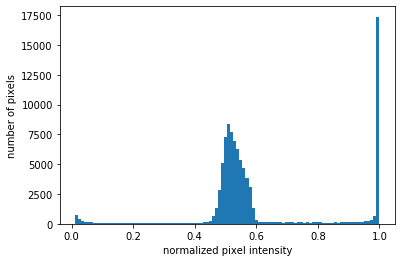

In [100]:
plt.hist(np.ravel(filtered), 100)
plt.ylabel('number of pixels')
plt.xlabel('normalized pixel intensity')

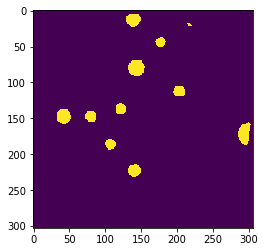

In [101]:
mask = filtered < 0.2
plt.imshow(mask)

In [105]:
help(measure.label)

Help on function label in module skimage.measure._label:

label(input, neighbors=None, background=None, return_num=False, connectivity=None)
    Label connected regions of an integer array.
    
    Two pixels are connected when they are neighbors and have the same value.
    In 2D, they can be neighbors either in a 1- or 2-connected sense.
    The value refers to the maximum number of orthogonal hops to consider a
    pixel/voxel a neighbor::
    
      1-connectivity     2-connectivity     diagonal connection close-up
    
           [ ]           [ ]  [ ]  [ ]             [ ]
            |               \  |  /                 |  <- hop 2
      [ ]--[x]--[ ]      [ ]--[x]--[ ]        [x]--[ ]
            |               /  |  \             hop 1
           [ ]           [ ]  [ ]  [ ]
    
    Parameters
    ----------
    input : ndarray of dtype int
        Image to label.
    neighbors : {4, 8}, int, optional
        Whether to use 4- or 8-"connectivity".
        In 3D, 4-"connect

In [103]:
from skimage import measure
labels, number_of_colonies = measure.label(mask, return_num=True, connectivity=2)

In [108]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [104]:
plt.imshow(labels, cmap='jet')

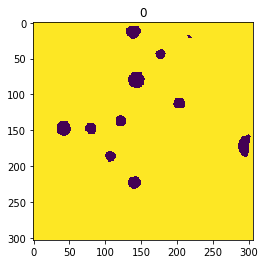

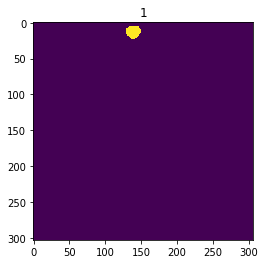

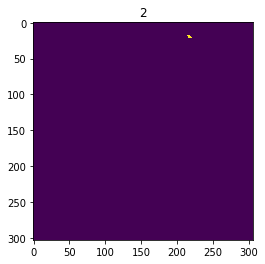

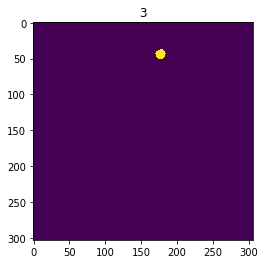

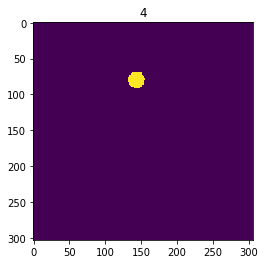

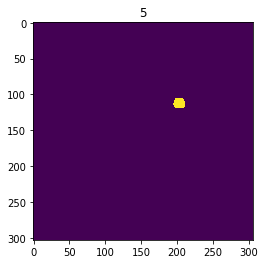

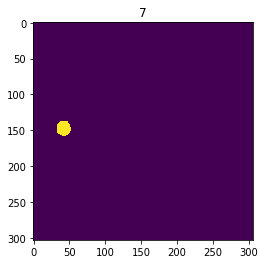

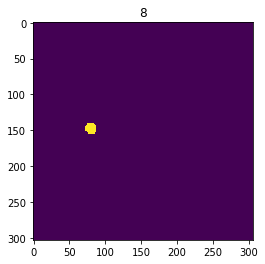

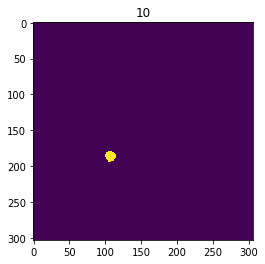

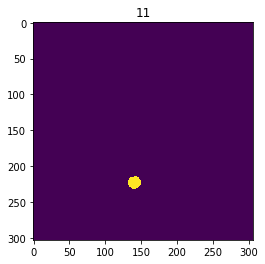

In [109]:
for num in range(number_of_colonies + 1):
    plt.figure()
    plt.imshow(labels == num)
    plt.title(num)

In [110]:
# Let's just look at all the code at once:
import ipywidgets as widgets
from skimage import filters
from skimage import color
from skimage import measure
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Load the image as gray
image = io.imread('colonies01.tif', as_gray=True)

def show_filt(sigma, threshold):
    img = image.copy()
    img = filters.gaussian(img, sigma=sigma)
    mask = img < threshold
    img[mask] = 0
    labels, number_of_cells = measure.label(mask, return_num=True, connectivity=2)
    print(number_of_cells)
    
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs[0].imshow(img, cmap='hot')
    axs[0].set_title('Sigma = ' + str(sigma) + '  Threshold = ' + str(threshold))
    fig.show()
    
    axs[1].imshow(labels, cmap='jet')
    axs[1].set_title('Number of cells = ' + str(number_of_cells))

widgets.interact(
    show_filt,
    sigma=widgets.FloatSlider(value=1.0, min=1.0, max=10.0, step=0.1),
    threshold=widgets.FloatSlider(value=0.5, min=0.0, max=1.0, step=0.1))

interactive(children=(FloatSlider(value=1.0, description='sigma', max=10.0, min=1.0), FloatSlider(value=0.5, d…

<function __main__.show_filt(sigma, threshold)>

# Conclusion

Read about other functions in skimage here:
https://scikit-image.org/

Look up error messages on Stack Overflow

Try to build a pipeline and test it! Don't just trust whatever number that comes out! Try to convince yourself that the answer makes sense. Count your cells by hand and see that your code reliably gives you the numbers that you expect. Test that the same threshold/filter settings works across all of your data--this is the same as setting some fair criterion for choosing what a "cell" is. To be really careful, you should break up your data into training and test data. Choose your threshold and parameters based on a few images, and test that your script works correctly on the data that you've never tested before.